In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import sys
from glob import glob
import numpy as np
import pandas as pd
import cv2
from PIL import Image
from tqdm.notebook import tqdm
from time import time

import matplotlib.pyplot as plt
import seaborn as sns
import multiprocessing as mp

In [8]:
class cfg:
    data_dir = '../input/data/train'  
    img_dir = f'{data_dir}/images'
    df_path = f'{data_dir}/train.csv'

In [9]:
num2class = ['incorrect_mask', 'mask1', 'mask2', 'mask3',
             'mask4', 'mask5', 'normal']
class2num = {k: v for v, k in enumerate(num2class)}

df = pd.read_csv(cfg.df_path)
df.head()

,id,gender,race,age,path
0,000001,female,Asian,45,000001_female_Asian_45
1,000002,female,Asian,52,000002_female_Asian_52
2,000004,male,Asian,54,000004_male_Asian_54
3,000005,female,Asian,58,000005_female_Asian_58
4,000006,female,Asian,59,000006_female_Asian_59


# RGB 값 분석

In [10]:
def get_ext(img_dir, img_id):
    """
    학습 데이터셋 이미지 폴더에는 여러 하위폴더로 구성되고, 이 하위폴더들에는 각 사람의 사진들이 들어가있습니다. 하위폴더에 속한 이미지의 확장자를 구하는 함수입니다.
    
    Args:
        img_dir: 학습 데이터셋 이미지 폴더 경로 
        img_id: 학습 데이터셋 하위폴더 이름

    Returns:
        ext: 이미지의 확장자
    """
    filename = os.listdir(os.path.join(img_dir, img_id))[0]
    ext = os.path.splitext(filename)[-1].lower()
    return ext

In [11]:
def get_img_stats(img_dir, img_ids):
    """
    데이터셋에 있는 이미지들의 크기와 RGB 평균 및 표준편차를 수집하는 함수입니다.
    
    Args:
        img_dir: 학습 데이터셋 이미지 폴더 경로 
        img_ids: 학습 데이터셋 하위폴더 이름들

    Returns:
        img_info: 이미지들의 정보 (크기, 평균, 표준편차)
    """
    img_info = dict(heights=[], widths=[], means=[], stds=[])
    for img_id in tqdm(img_ids):
        for path in glob(os.path.join(img_dir, img_id, '*')):
            img = np.array(Image.open(path))
            h, w, _ = img.shape
            img_info['heights'].append(h)
            img_info['widths'].append(w)
            img_info['means'].append(img.mean(axis=(0,1)))
            img_info['stds'].append(img.std(axis=(0,1)))
    return img_info

In [12]:
img_info = get_img_stats(cfg.img_dir, df.path.values[:100])

print(f'Total number of people is {len(df)}')
print(f'Total number of images is {len(df) * 7}')

print(f'Minimum height for dataset is {np.min(img_info["heights"])}')
print(f'Maximum height for dataset is {np.max(img_info["heights"])}')
print(f'Average height for dataset is {int(np.mean(img_info["heights"]))}')
print(f'Minimum width for dataset is {np.min(img_info["widths"])}')
print(f'Maximum width for dataset is {np.max(img_info["widths"])}')
print(f'Average width for dataset is {int(np.mean(img_info["widths"]))}')

print(f'RGB Mean: {np.mean(img_info["means"], axis=0) / 255.}')
print(f'RGB Standard Deviation: {np.mean(img_info["stds"], axis=0) / 255.}')


Total number of people is 2700
Total number of images is 18900
Minimum height for dataset is 512
Maximum height for dataset is 512
Average height for dataset is 512
Minimum width for dataset is 384
Maximum width for dataset is 384
Average width for dataset is 384
RGB Mean: [0.55800916 0.51224077 0.47767341]
RGB Standard Deviation: [0.21817792 0.23804603 0.25183411]


# 객체 위치 확인

In [13]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [14]:
imgs = []
img_id = df.iloc[500].path
ext = get_ext(cfg.img_dir, img_id)
for class_id in num2class:
    img = np.array(Image.open(os.path.join(cfg.img_dir, img_id, class_id+ext)))
    imgs.append(img)
imgs = np.array(imgs)

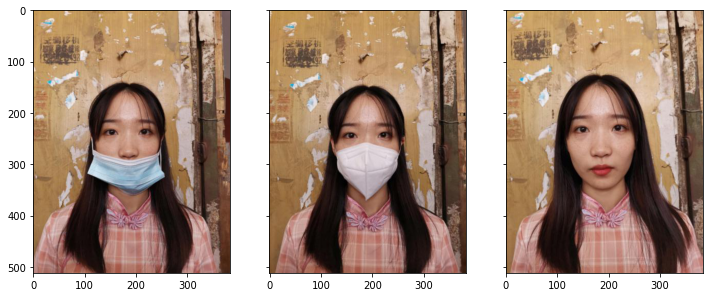

In [15]:
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12, 6))
axes[0].imshow(imgs[0])
axes[1].imshow(imgs[1])
axes[2].imshow(imgs[-1])
plt.show()

# Traget값 y에 대한 분석

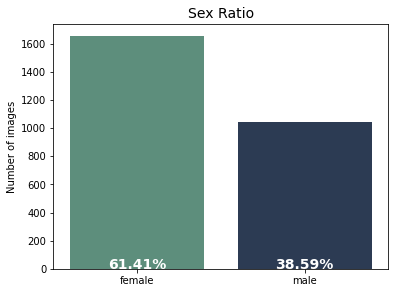

In [16]:
plt.figure(figsize=(6, 4.5)) 
ax = sns.countplot(x = 'gender', data = df, palette=["#55967e", "#263959"])

plt.xticks( np.arange(2), ['female', 'male'] )
plt.title('Sex Ratio',fontsize= 14)
plt.xlabel('')
plt.ylabel('Number of images')

counts = df['gender'].value_counts()
counts_pct = [f'{elem * 100:.2f}%' for elem in counts / counts.sum()]
for i, v in enumerate(counts_pct):
    ax.text(i, 0, v, horizontalalignment = 'center', size = 14, color = 'w', fontweight = 'bold')
    
plt.show()

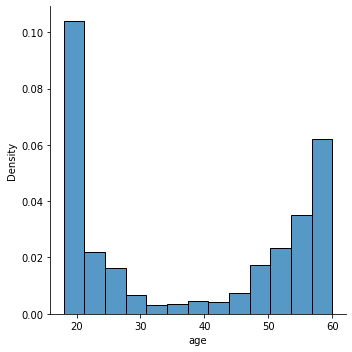

In [17]:
sns.displot(df, x="age", stat="density")
plt.show()

# 성별 확인

In [4]:
condition = 'gender'
train_data_female = train_data[train_data[condition] == 'female']
train_data_female

,id,gender,race,age,path
0,000001,female,Asian,45,000001_female_Asian_45
1,000002,female,Asian,52,000002_female_Asian_52
3,000005,female,Asian,58,000005_female_Asian_58
4,000006,female,Asian,59,000006_female_Asian_59
5,000007,female,Asian,58,000007_female_Asian_58
...,...,...,...,...,...
2591,006637,female,Asian,19,006637_female_Asian_19
2596,006648,female,Asian,19,006648_female_Asian_19
2632,006694,female,Asian,19,006694_female_Asian_19
2660,006737,female,Asian,19,006737_female_Asian_19


In [5]:
train_data_male = train_data[train_data[condition] == 'male']
train_data_male

,id,gender,race,age,path
2,000004,male,Asian,54,000004_male_Asian_54
9,000012,male,Asian,57,000012_male_Asian_57
11,000015,male,Asian,55,000015_male_Asian_55
26,000033,male,Asian,57,000033_male_Asian_57
34,000043,male,Asian,56,000043_male_Asian_56
...,...,...,...,...,...
2695,006954,male,Asian,19,006954_male_Asian_19
2696,006955,male,Asian,19,006955_male_Asian_19
2697,006956,male,Asian,19,006956_male_Asian_19
2698,006957,male,Asian,20,006957_male_Asian_20


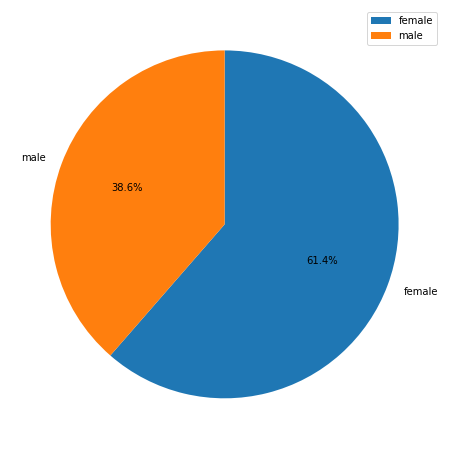

In [6]:
ratio = [len(train_data_female), len(train_data_male)]
labels = ['female', 'male']

fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot()

pie = ax.pie(ratio, labels=labels, autopct='%.1f%%',startangle=90, counterclock=False)

plt.legend(pie[0],labels)
plt.show()

# 나이확인

In [7]:
condition = 'age'
train_data_young = train_data[train_data[condition] < 30]
train_data_young

,id,gender,race,age,path
66,000225,female,Asian,25,000225_female_Asian_25
122,000309,male,Asian,29,000309_male_Asian_29
273,000685,male,Asian,19,000685_male_Asian_19
380,001003,male,Asian,24,001003_male_Asian_24
381,001004,female,Asian,23,001004_female_Asian_23
...,...,...,...,...,...
2695,006954,male,Asian,19,006954_male_Asian_19
2696,006955,male,Asian,19,006955_male_Asian_19
2697,006956,male,Asian,19,006956_male_Asian_19
2698,006957,male,Asian,20,006957_male_Asian_20


In [8]:
condition = 'age'
train_data_middle = train_data[train_data[condition] >= 30 ]
train_data_middle = train_data_middle[train_data_middle[condition] <60]
train_data_middle

,id,gender,race,age,path
0,000001,female,Asian,45,000001_female_Asian_45
1,000002,female,Asian,52,000002_female_Asian_52
2,000004,male,Asian,54,000004_male_Asian_54
3,000005,female,Asian,58,000005_female_Asian_58
4,000006,female,Asian,59,000006_female_Asian_59
...,...,...,...,...,...
2248,005555,male,Asian,48,005555_male_Asian_48
2249,005556,male,Asian,50,005556_male_Asian_50
2250,005557,male,Asian,46,005557_male_Asian_46
2251,005558,male,Asian,52,005558_male_Asian_52


In [9]:
condition = 'age'
train_data_old = train_data[train_data[condition] >= 60 ]
train_data_old

,id,gender,race,age,path
416,001038,male,Asian,60,001038_male_Asian_60
422,001043,male,Asian,60,001043_male_Asian_60
427,001047,male,Asian,60,001047_male_Asian_60
443,001063,female,Asian,60,001063_female_Asian_60
476,001101,male,Asian,60,001101_male_Asian_60
...,...,...,...,...,...
2168,005453,female,Asian,60,005453_female_Asian_60
2173,005459,male,Asian,60,005459_male_Asian_60
2175,005461,female,Asian,60,005461_female_Asian_60
2209,005504,female,Asian,60,005504_female_Asian_60


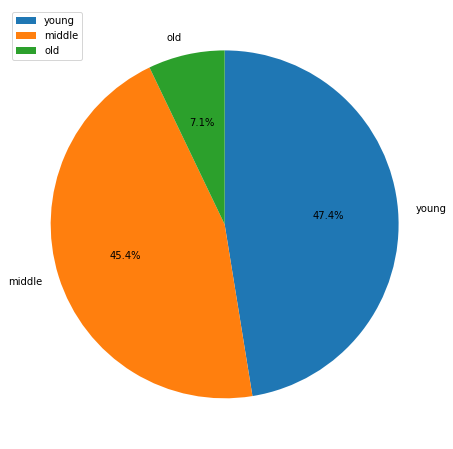

In [10]:
ratio = [len(train_data_young), len(train_data_middle),len(train_data_old)]
labels = ['young', 'middle','old']

fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot()

pie = ax.pie(ratio, labels=labels, autopct='%.1f%%',startangle=90, counterclock=False)

plt.legend(pie[0],labels)
plt.show()

# 이미지 확인